Math 5750/6880: Mathematics of Data Science \\
Project 1

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns # for pairwise scatter plot

import statsmodels.formula.api as sm

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here
def sum_multiples_of_three_or_five(test_list):
    sum=0
    for i in test_list:
        if (i%3==0) or (i%5==0): # remainder 0
            sum+=i
    return sum

list_1=[i for i in range (1,1000)] # 1 to 999
output=sum_multiples_of_three_or_five(list_1)
print("the sum of all the multiples of 3 or 5 below 1000 is:",output )

the sum of all the multiples of 3 or 5 below 1000 is: 233168


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [4]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [5]:
y_df=pd.DataFrame(y)

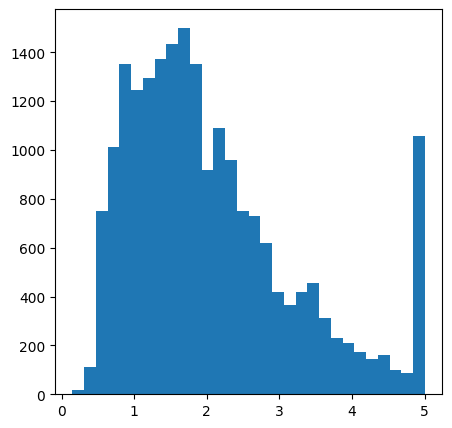

In [11]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.hist(y, bins=30)
plt.show()

In [ ]:
number_of_in_bin_approches_5 = sum(1 for x in y_df['MedHouseVal'] if (x <= 5.01) and (x >=4.99))
print(number_of_in_bin_approches_5 )

994


# The histogram of y is slightly right-skewed, with many values close to 5.

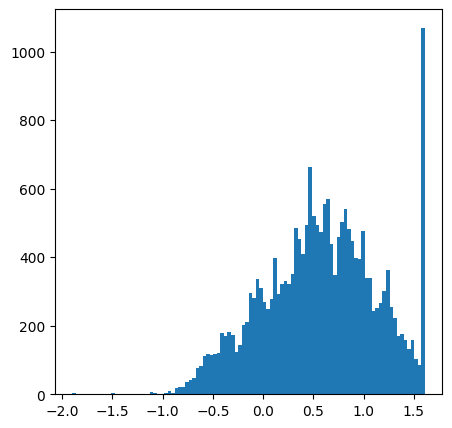

In [12]:
np.log(y)
plt.hist(np.log(y), bins=100)
plt.show()

still a but skewed. But better.

In [13]:
df_data=pd.DataFrame(X)
df_X_and_y=pd.concat([y_df, df_data], axis=1)# creating data frame from np array

In [14]:
df_X_and_y

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
#print(df_X_and_y.info())#float 64, int 64, oject 92
#print(df_X_and_y.head())

print(df_X_and_y.describe()) # summary statistics
print(df_X_and_y.shape)#(20640, 9)

#print(df_X_and_y.columns )
column_name=list(df_X_and_y.axes[1])
print("head:",column_name)

        MedHouseVal        MedInc      HouseAge      AveRooms     AveBedrms  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       2.068558      3.870671     28.639486      5.429000      1.096675   
std        1.153956      1.899822     12.585558      2.474173      0.473911   
min        0.149990      0.499900      1.000000      0.846154      0.333333   
25%        1.196000      2.563400     18.000000      4.440716      1.006079   
50%        1.797000      3.534800     29.000000      5.229129      1.048780   
75%        2.647250      4.743250     37.000000      6.052381      1.099526   
max        5.000010     15.000100     52.000000    141.909091     34.066667   

         Population      AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean    1425.476744      3.070655     35.631861   -119.569704  
std     1132.462122     10.386050      2.135952      2.003532  
min        3.000000      0.69230

More graphs

pairwisde scatter plot to check relationships

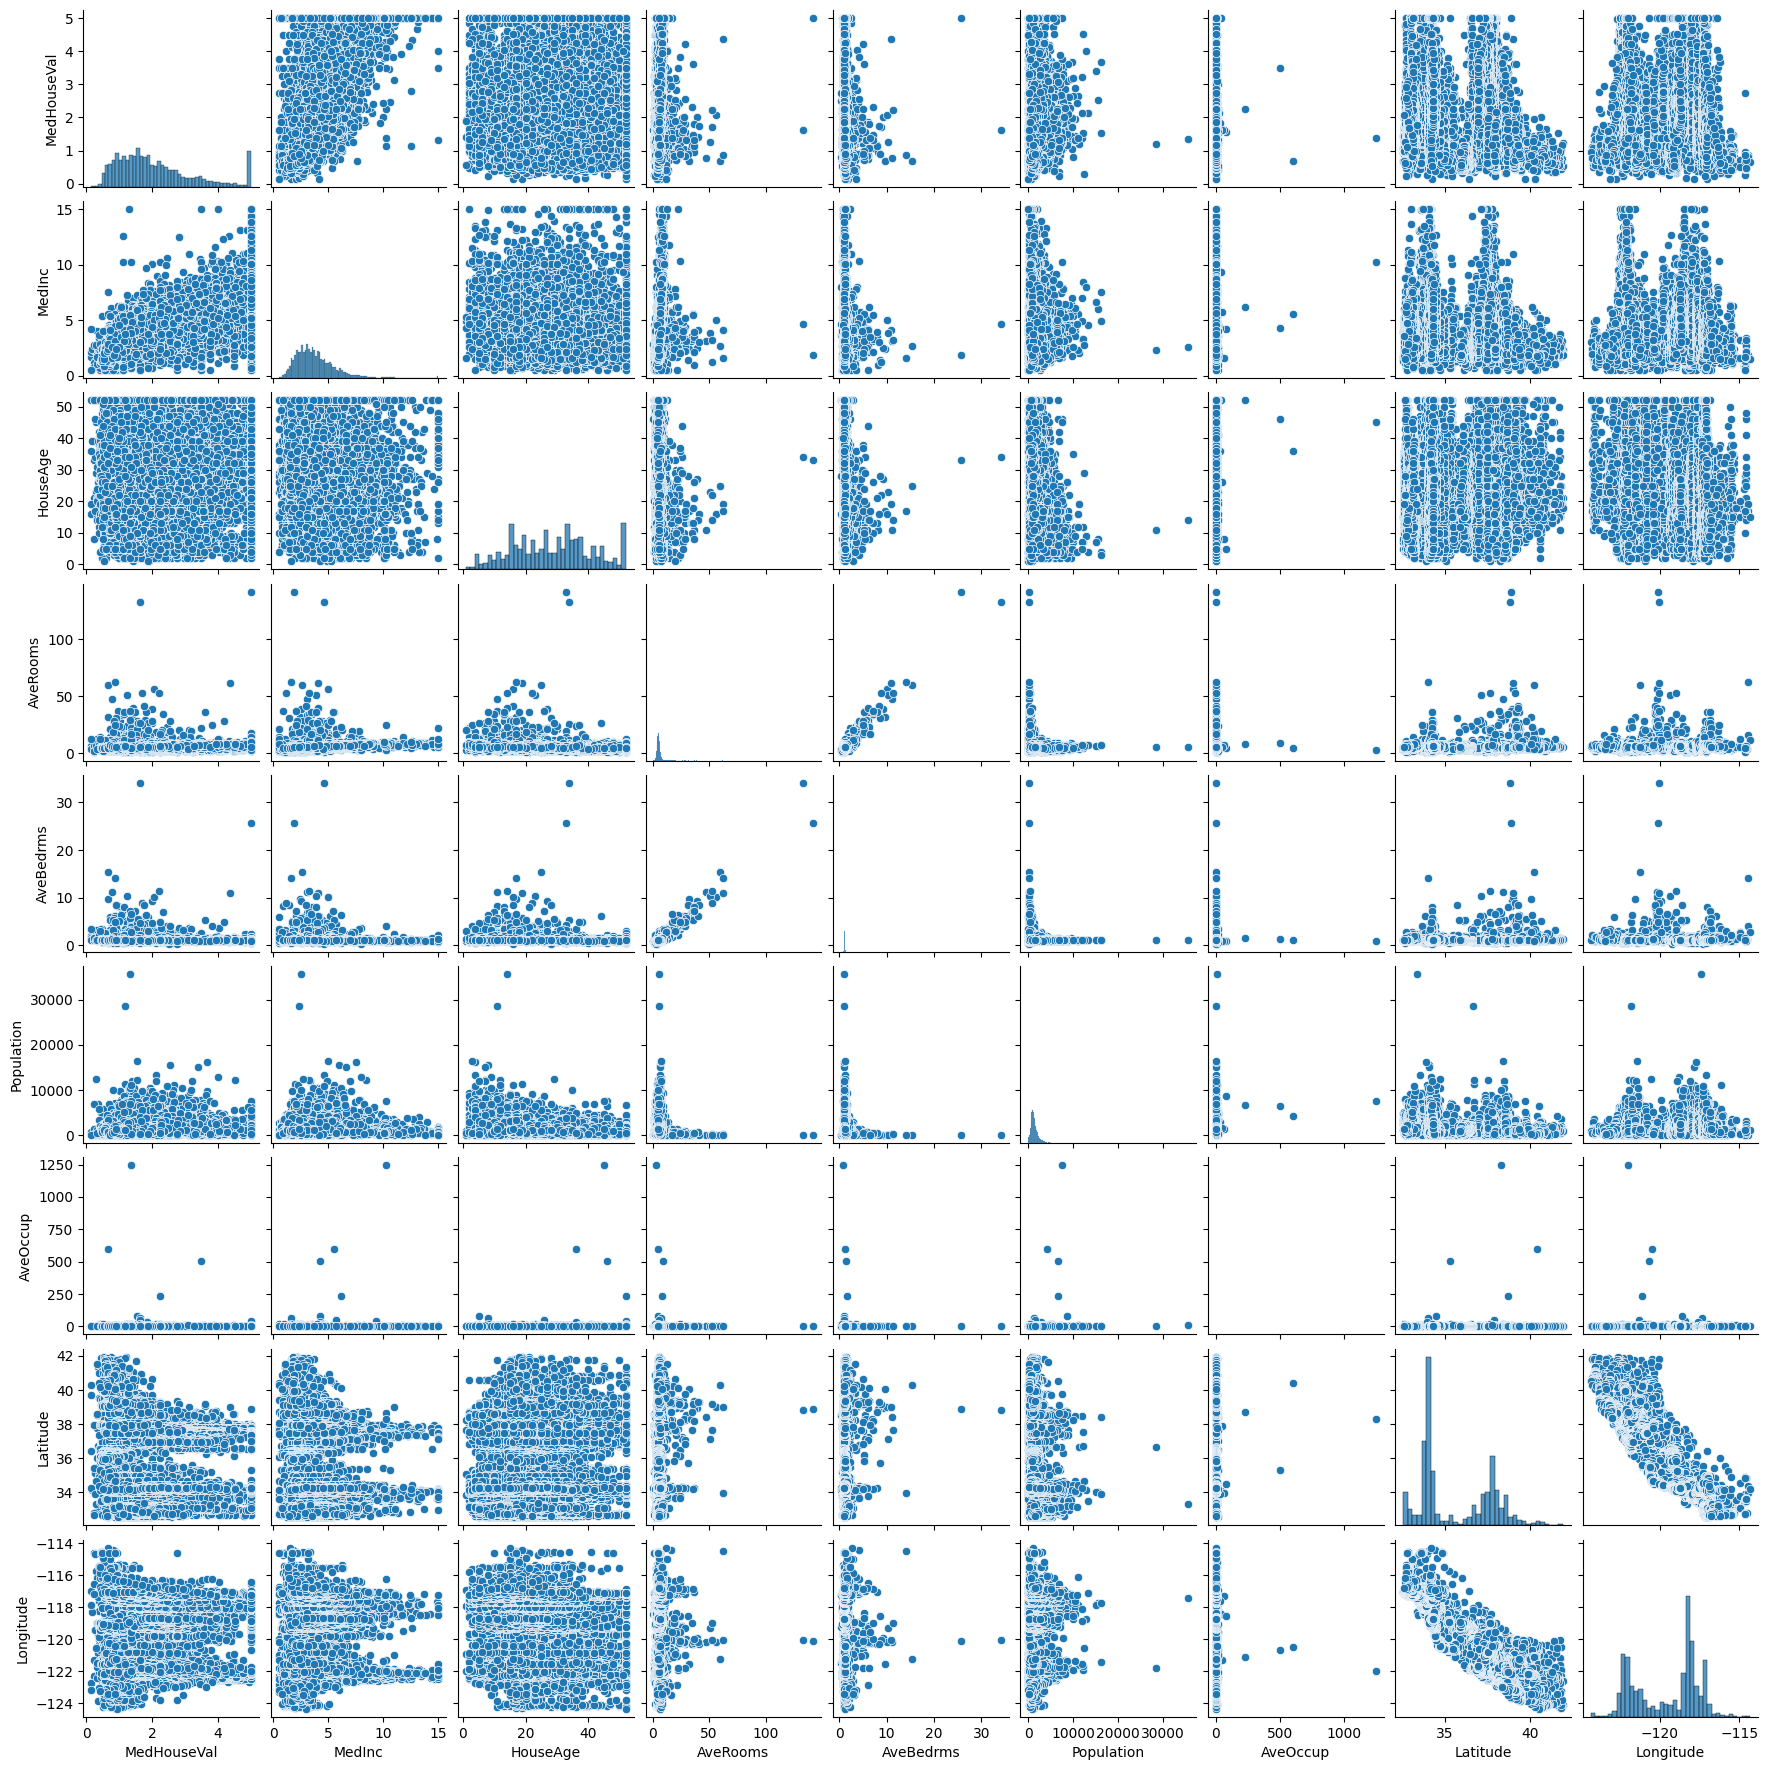

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10) #make picture a bit bigger
sns.pairplot(df_X_and_y, height=2,  diag_kind="hist");
plt.show()

  - y shows some positive (linear) relationship with MedInc, has some weak linear relationship with AveBedrms. And latitude shows a bit negative relationship with median house value. And I can not see any linear relationship with others, they are very scattered. And overall, the pairwise linear relationship is not very strong between y and x_i's.This may implies the linear regression may not fit very well
  - Covariates' correlations: (1) AveBedrms and AveRooms, (2) Longitude and Latitude.
  - Maybe will say more on locations (geographical) and covariates patterns later??

In [16]:
#scale data avoid big number bias
from sklearn.preprocessing import StandardScaler

scaler_obj= StandardScaler()
scaled_data_1 = scaler_obj.fit_transform(df_X_and_y)
df_X_and_y_sclaed= pd.DataFrame(scaled_data_1, columns=df_X_and_y.columns)
df_X_and_y_sclaed

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.129631,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,1.314156,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.258693,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.165100,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.172900,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...,...
20635,-1.115804,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-1.124470,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-0.992746,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.058608,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [17]:
correlation_matrix = df_X_and_y_sclaed.corr()
correlation_matrix

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedHouseVal,1.000000,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967
MedInc,0.688075,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,0.105623,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.151948,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.046701,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,-0.024650,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,-0.023737,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.144160,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.045967,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Similar conclusions as before, but looks like MedInc has strongest linear relationship with target var y.

# Regression starts here

# Linear regression

In [18]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)# my model output
y_pred_linear_test = reg_linear.predict(X_test)
y_pred_linear_train=reg_linear.predict(X_train)

range_test_data=np.ptp(y_test) # this is range function for np array, goal see relative error (normalized)

RMSE_linear_testing=np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
print("Regression  RMSE for linear regression of testing data set:", RMSE_linear_testing)

R_sqaure_linear_testing=reg_linear.score(X_test, y_test) # give R^2(y_test, y^_test)
print("Regression  R^2 for linear regression of testing data set:",R_sqaure_linear_testing)

MAE_linear_testing=mean_absolute_error(y_test, y_pred_linear_test)
print("Regression MAE for linear regression of testing data set:", MAE_linear_testing)

#Training set:
RMSE_linear_training=np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
print("Regression  RMSE for linear regression of testing data set:", RMSE_linear_training)

R_sqaure_linear_training=reg_linear.score(X_train, y_train)
print("Regression  R^2 for linear regression of training data set:", R_sqaure_linear_training)

MAE_linear_training=mean_absolute_error(y_train, y_pred_linear_train)
print("Regression MAE for linear regression of testing data set:", MAE_linear_training)

Regression  RMSE for linear regression of testing data set: 0.7273129773603114
Regression  R^2 for linear regression of testing data set: 0.5943232652466202
Regression MAE for linear regression of testing data set: 0.535126133655451
Regression  RMSE for linear regression of testing data set: 0.7234924745376035
Regression  R^2 for linear regression of training data set: 0.6088968118672871
Regression MAE for linear regression of testing data set: 0.530874354486376


In [19]:
print("Coefficients:", reg_linear.coef_)

Coefficients: [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]


In [20]:
import statsmodels.formula.api as sm

In [21]:
lin_reg_ols=sm.ols(formula="MedHouseVal~ MedInc+HouseAge+AveRooms+AveBedrms+Population+AveOccup+Latitude+Longitude",
                        data=df_X_and_y).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:11:44   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- population p-val (t statistic) too big and coef approaches 0, we may exclude it as a covariate.
- AveBedrms (64k) seems most important, and MedInc coeff (43k) is also essential.
- Latitude and Longitude have a negative impact on prices, and can not be neglected.
-  HouseAge, AveOccup, and Population has small coef, so not very important to prices and may be excluded?
- Note that AveBedrm actually has the largest |coef|, but the correlation coefficient between y and AveBedrm is actually not the biggest?

In [24]:
lin_reg_ols2=sm.ols(formula="MedHouseVal~ MedInc+AveRooms+AveBedrms+Latitude+Longitude+HouseAge",
                        data=df_X_and_y).fit()
lin_reg_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     5268.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:14:52   Log-Likelihood:                -22655.
No. Observations:               20640   AIC:                         4.532e+04
Df Residuals:                   20633   BIC:                         4.538e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.0727      0.659    -56.263      0.000     -38.364     -35.781
MedInc         0.4356      0.004    103.721      0.000       0.427       0.444
AveRooms      -0.1060      0.006    -18.000      0.000      -0.118      -0.094
AveBedrms      0.6405      0.028     22.738      0.000       0.585       0.696
Latitude      -0.4224      0.007    -58.944      0.000      -0.436      -0.408
Longitude     -0.4358      0.008    -57.956      0.000      -0.451      -0.421
HouseAge       0.0095      0.000     22.413      0.000       0.009       0.010
==============================================================================
Omnibus:                     4380.206   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14084.851
Skew:                           1.078   Prob(JB):                         0.00
Kurtosis:                       6.425   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Residual plot

In [25]:
# for the whole data set train
residuals_whole_data_linear = lin_reg_ols.resid # a pd series of one column which is residual, but named 0
residuals_whole_data_linear.name = "residual ols"
#residuals_whole_data_linear

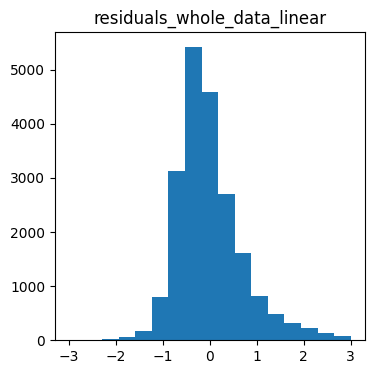

-7.345275761159996

In [85]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.hist(residuals_whole_data_linear , bins=17, range=(-3, 3))
plt.title("residuals_whole_data_linear")

plt.show()
residuals_whole_data_linear.min()

In [27]:
residuals_trian_linear=y_train-y_pred_linear_train
residuals_trian_linear.name = "residual train linear"
#residuals_trian_linear

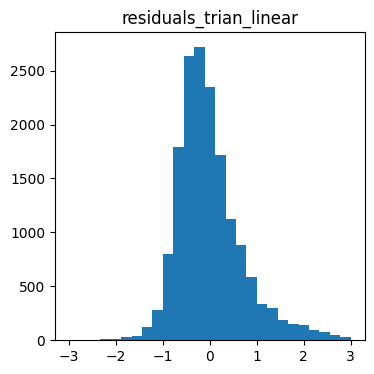

In [86]:
plt.hist(residuals_trian_linear , bins=27, range=(-3, 3))
plt.title("residuals_trian_linear")

plt.show()

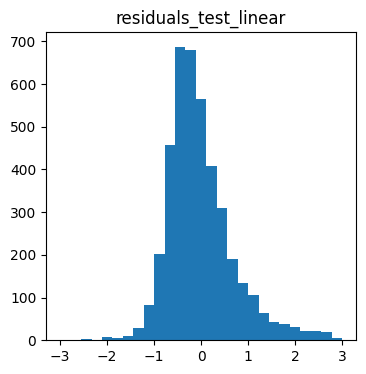

In [87]:
residuals_test_linear=y_test-y_pred_linear_test
residuals_test_linear.name = "residual test linear"

plt.hist(residuals_test_linear , bins=27, range=(-3, 3))
plt.title("residuals_test_linear")

plt.show()

predicted vs true plots

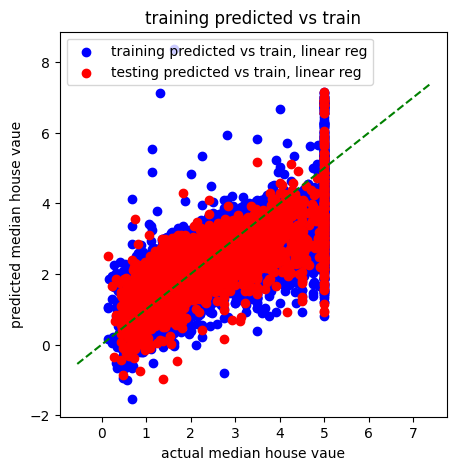

In [91]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.scatter(y_train , y_pred_linear_train, label=r'training predicted vs train, linear reg', color='blue')
plt.scatter(y_test , y_pred_linear_test, label=r'testing predicted vs train, linear reg', color='red')
plt.xlabel('actual median house vaue')
plt.ylabel(r'predicted median house vaue')
plt.title(r'training predicted vs train')

# draw 45 degree stright line to compare
limit = [min(y_train.min(), y_pred_linear_train.min(),y_test.min(), y_pred_linear_test.min() )+1,# +1 here reduce balnks (原: x:(-2,8), now (-1,6))
        max(y_train.max(), y_pred_linear_train.max(),y_test.max(), y_pred_linear_test.max())-1] # x and y range should be the min of all possible lower limit of range of both sets

plt.plot(limit, limit, color="green", linestyle="--", zorder=2)  # y = x line


# force x and y have same unit length in plt plot, original only fit for size (5,5)
plt.legend()

plt.show()


# Random forest

In [31]:


Cs_1 = np.linspace(1, 35, 35, dtype=int)
print(Cs_1)
r_sqaure_rf1 = np.zeros(Cs_1.shape[0]) # or Accuracies = np.zeros(len(Cs))

#Cs.shape[0] is used to get the length of the first dimension (number of rows) of the Cs array for iteration??
for i,n_i in enumerate(Cs_1): # i is the index (position) of the current element in Cs, while C is the actual value (element) at that index in Cs.

    reg_random_forest2 = RandomForestRegressor(n_estimators=n_i, random_state=42)
    scores_rf1 = cross_val_score(estimator = reg_random_forest2, X = X_train, y = y_train, cv=5, scoring='r2')#should have 5 scores as cs= num of chunks to split
    r_sqaure_rf1[i]  = scores_rf1.mean()
    print(i, end=" ")
#print(Accuracies_2)
plt.plot(Cs_1,r_sqaure_rf1)
plt.show()

#plt.plot(Cs_1[:10],r_sqaure_rf1[:10])
#plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

KeyboardInterrupt: 

In [34]:
reg_random_forest=RandomForestRegressor(n_estimators=19, random_state=42)#select other parameters by CV later
reg_random_forest.fit(X_train, y_train)
y_pred_random_forest_testing= reg_random_forest.predict(X_test)

y_pred_random_forest_training=reg_random_forest.predict(X_train)

RMSE_random_forest_testing=np.sqrt(mean_squared_error(y_test, y_pred_random_forest_testing))
print("Regression  RMSE for random forest regression of testing data set:", RMSE_random_forest_testing)

R_sqaure_random_forest_testing=reg_random_forest.score(X_test, y_test) # give R^2(y_test, y^_test)
print("Regression  R^2 for random forest regression of testing data set:",R_sqaure_random_forest_testing)

MAE_random_forest_testing=mean_absolute_error(y_test, y_pred_random_forest_testing)
print("Regression MAE for random forest regression of testing data set:", MAE_random_forest_testing)


RMSE_random_forest_training=np.sqrt(mean_squared_error(y_train, y_pred_random_forest_training))
print("Regression  RMSE for random forest regression of training data set:", RMSE_random_forest_training)

R_sqaure_random_forest_training=reg_random_forest.score(X_train, y_train) # give R^2(y_test, y^_test)
print("Regression  R^2 for random forest regression of training data set:",R_sqaure_random_forest_training)

MAE_random_forest_training=mean_absolute_error(y_train, y_pred_random_forest_training)
print("Regression MAE for random forest regression of training data set:", MAE_random_forest_training)


Regression  RMSE for random forest regression of testing data set: 0.5279590039449722
Regression  R^2 for random forest regression of testing data set: 0.7862343940333001
Regression MAE for random forest regression of testing data set: 0.34849822878416964
Regression  RMSE for random forest regression of training data set: 0.21121022888175908
Regression  R^2 for random forest regression of training data set: 0.9666686261841795
Regression MAE for random forest regression of training data set: 0.13416236153610767


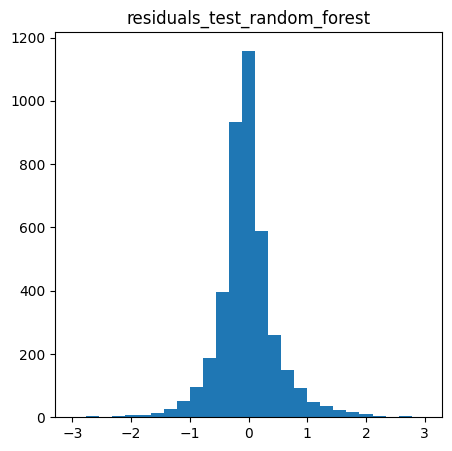

In [70]:
residuals_test_random_forest=y_test-y_pred_random_forest_testing
residuals_test_random_forest.name = "residual test random_forest"

plt.hist(residuals_test_random_forest, bins=27, range=(-3, 3))
plt.title("residuals_test_random_forest")

plt.show()

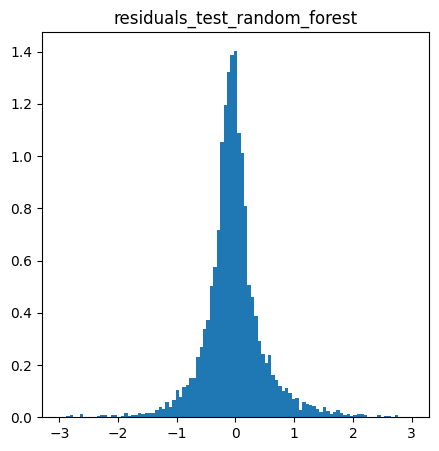

In [36]:
plt.hist(residuals_test_random_forest ,density=True, bins=103, range=(-3, 3))
plt.title("residuals_test_random_forest")

plt.show()

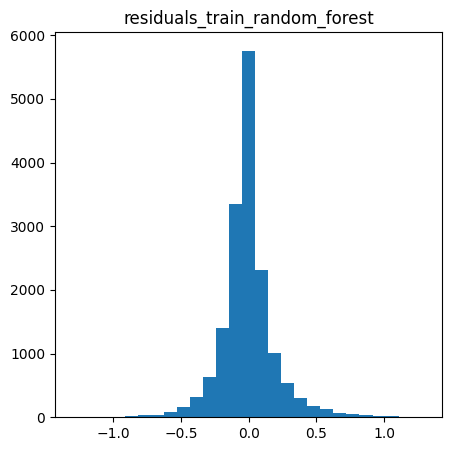

In [71]:
residuals_train_random_forest=y_train-y_pred_random_forest_training
residuals_train_random_forest.name = "residual train random_forest"

plt.hist(residuals_train_random_forest , bins=27, range=(-1.3, 1.3))
plt.title("residuals_train_random_forest")

plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

Tune paramters of random forest

In [45]:
#reg_random_forest
#GridSearchCV use this

# Parameter in grid: max_depth, min_samples_split, min_samples_leaf
param_grid_1 = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# GridSearchCV
grid_search_1 = GridSearchCV(reg_random_forest, param_grid_1, cv=5, scoring='r2', n_jobs=-1) # n_jobs=-1, speed up training and CV code running
grid_search_1.fit(X_train, y_train)

print("Best parameters:", grid_search_1.best_params_)
print("Best CV R^2:", grid_search_1.best_score_)

# Evaluate on test set
y_pred_random_forest_testing_2 = grid_search_1.best_estimator_.predict(X_test) #grid_search_1.best_estimator_: selected "best" rf object
print("grid_search_1.best_estimator R^2, test:", r2_score(y_test, y_pred_random_forest_testing_2 ))




Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV R^2: 0.7896482736693692
grid_search_1.best_estimator R^2: 0.7840028190472231


In [46]:
y_pred_random_forest_training_2=grid_search_1.best_estimator_.predict(X_train)
print("grid_search_1.best_estimator R^2, train:", r2_score(y_train, y_pred_random_forest_training_2 ))

grid_search_1.best_estimator R^2, train: 0.9340028704911766


- stil overfit, drop down max_depth

In [50]:
param_grid_2 = {
    'max_depth': [5, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search_2 = GridSearchCV(reg_random_forest, param_grid_2, cv=5, scoring='r2', n_jobs=-1) # n_jobs=-1, speed up training and CV code running
grid_search_2.fit(X_train, y_train)

print("Best parameters:", grid_search_2.best_params_)
print("Best CV R^2:", grid_search_2.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV R^2: 0.7722039726678103
grid_search_1.best_estimator R^2, train: 0.9340028704911766


In [57]:
y_pred_random_forest_training_2=grid_search_2.best_estimator_.predict(X_train)
print("grid_search_2.best_estimator R^2, train:", r2_score(y_train, y_pred_random_forest_training_2 ))
y_pred_random_forest_testing_2 = grid_search_2.best_estimator_.predict(X_test) #grid_search_1.best_estimator_: selected "best" rf object
print("grid_search_2.best_estimator R^2, test:", r2_score(y_test, y_pred_random_forest_testing_2 ))

grid_search_2.best_estimator R^2, train: 0.8510885463279492
grid_search_2.best_estimator R^2, test: 0.7608994982747643


- still a bit overfit, keep droping number of trees

In [60]:
param_grid_3 = {
    'max_depth': [9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# GridSearchCV
grid_search_3 = GridSearchCV(reg_random_forest, param_grid_3, cv=5, scoring='r2', n_jobs=-1) # n_jobs=-1, speed up training and CV code running
grid_search_3.fit(X_train, y_train)

print("Best parameters:", grid_search_3.best_params_)
print("Best CV R^2:", grid_search_3.best_score_)

# Evaluate on train set to see if overfit
y_pred_random_forest_training_3=grid_search_3.best_estimator_.predict(X_train)
print("grid_search_1.best_estimator R^2, train:", r2_score(y_train, y_pred_random_forest_training_3 ))

Best parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV R^2: 0.7609365455142116
grid_search_1.best_estimator R^2, train: 0.8202989326338084


In [62]:
y_pred_random_forest_testing_3 = grid_search_3.best_estimator_.predict(X_test)
print("grid_search_3.best_estimator R^2, test:", r2_score(y_test, y_pred_random_forest_testing_3 ))

grid_search_3.best_estimator R^2, test: 0.7464220539484341


Looks like training R^2 will be higher than testing constantly. But still better than linear regression.Lets now output errors and plots.

In [63]:
RMSE_random_forest_testing_3=np.sqrt(mean_squared_error(y_test, y_pred_random_forest_testing_3))
print("Regression  RMSE for random forest regression of testing_3 data set:", RMSE_random_forest_testing_3)


MAE_random_forest_testing_3=mean_absolute_error(y_test, y_pred_random_forest_testing_3)
print("Regression MAE for random forest regression of testing_3 data set:", MAE_random_forest_testing_3)


RMSE_random_forest_training_3=np.sqrt(mean_squared_error(y_train, y_pred_random_forest_training_3))
print("Regression  RMSE for random forest regression of training_3 data set:", RMSE_random_forest_training_3)


MAE_random_forest_training_3=mean_absolute_error(y_train, y_pred_random_forest_training_3)
print("Regression MAE for random forest regression of training_3 data set:", MAE_random_forest_training_3)

Regression  RMSE for random forest regression of testing_3 data set: 0.5750253958503497
Regression MAE for random forest regression of testing_3 data set: 0.39437533286803395
Regression  RMSE for random forest regression of training_3 data set: 0.4904149132667528
Regression MAE for random forest regression of training_3 data set: 0.3391485388875141


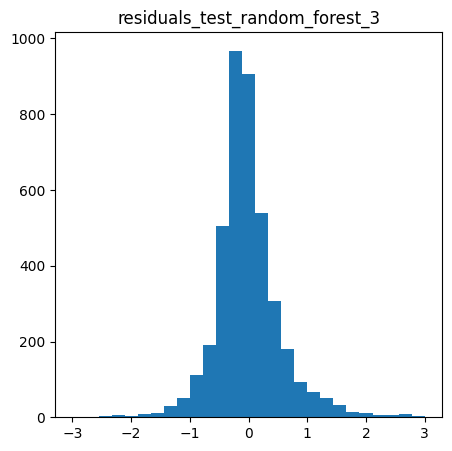

In [72]:
residuals_test_random_forest_3=y_test-y_pred_random_forest_testing_3
residuals_test_random_forest_3.name = "residual test random_forest"

plt.hist(residuals_test_random_forest_3, bins=27, range=(-3, 3))
plt.title("residuals_test_random_forest_3")

plt.show()

In [75]:
plt.rcParams['figure.figsize'] = (5, 5) #make picture a bit bigger

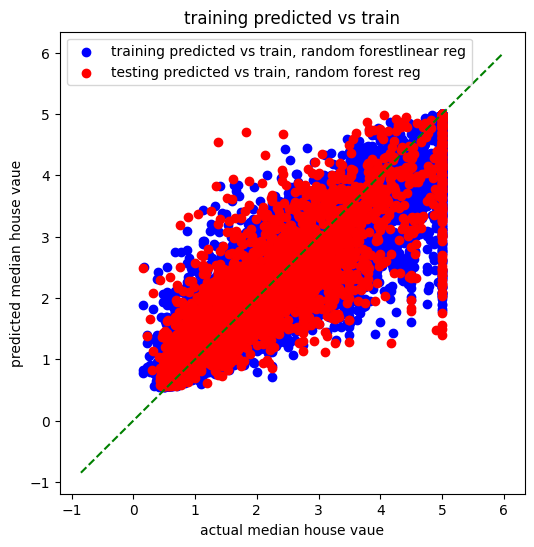

In [82]:
plt.scatter(y_train , y_pred_random_forest_training_3, label=r'training predicted vs train, random forestlinear reg', color='blue')
plt.scatter(y_test , y_pred_random_forest_testing_3, label=r'testing predicted vs train, random forest reg', color='red')
plt.xlabel('actual median house vaue')
plt.ylabel(r'predicted median house vaue')
plt.title(r'training predicted vs train')

# draw 45 degree stright line to compare
limit2 = [min(y_train.min(), y_pred_random_forest_training_3.min(),y_test.min(), y_pred_random_forest_testing_3.min() )-1,# now,the domain of line 坐标 shifted to (-1,6)
        max(y_train.max(), y_pred_random_forest_training_3.max(),y_test.max(), y_pred_random_forest_testing_3.max())+1] # x and y range should be the min of all possible lower limit of range of both sets


plt.plot(limit2, limit2, color="green", linestyle="--", zorder=2)  # y=x line, green, drawn above other plots



# force x and y have same unit length in plt plot, original only fit for size (5,5)
plt.legend()

plt.show()

# Laaso for feature seletcion (LassoCV)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV # this one use cv to find lamda directly

scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train)
X_test_scaled_reg=scaler.fit_transform(X_test)

In [ ]:


reg_lasso = LassoCV(cv=10).fit(X_train_scaled_reg, y_train)

alpha_selected=reg_lasso.alpha_
coef=reg_lasso.coef_

print("Best alpha (λ):", alpha_selected)
print(coef)
print(print("head:",column_name))


Best alpha (λ): 0.0026243491997088443
[ 0.81251151  0.11965425 -0.21181254  0.25337909 -0.00499175 -0.02874441
 -0.87214175 -0.84070794]
head: ['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
None


In [ ]:
y_pred_lasso_testing= reg_lasso.predict(X_test_scaled_reg)

y_pred_lasso_training=reg_lasso.predict(X_train_scaled_reg)

RMSE_lasso_testing=np.sqrt(mean_squared_error(y_test, y_pred_lasso_testing))
print("Regression  RMSE for lasso regression of testing data set:", RMSE_lasso_testing)

R_sqaure_lasso_testing=reg_lasso.score(X_test_scaled_reg, y_test) # give R^2(y_test, y^_test)
print("Regression  R^2 for lassot regression of testing data set:",R_sqaure_lasso_testing)

MAE_lasso_testing=mean_absolute_error(y_test, y_pred_lasso_testing)
print("Regression MAE for lasso regression of testing data set:", MAE_lasso_testing)


RMSE_lasso_training=np.sqrt(mean_squared_error(y_train, y_pred_lasso_training))
print("Regression  RMSE for lasso regression of training data set:", RMSE_lasso_training)

R_sqaure_lasso_training=reg_lasso.score(X_train_scaled_reg, y_train) # give R^2(y_test, y^_test)
print("Regression  R^2 for lasso regression of training data set:",R_sqaure_lasso_training)

MAE_lasso_training=mean_absolute_error(y_train, y_pred_lasso_training)
print("Regression MAE for lasso regression of training data set:", MAE_lasso_training)

Regression  RMSE for lasso regression of testing data set: 0.7276704906499234
Regression  R^2 for lassot regression of testing data set: 0.5939243435315702
Regression MAE for lasso regression of testing data set: 0.5360810165128295
Regression  RMSE for lasso regression of training data set: 0.723762434499486
Regression  R^2 for lasso regression of training data set: 0.6086048892733277
Regression MAE for lasso regression of training data set: 0.5313809466535196


# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data_2 = load_breast_cancer(as_frame=True)
X_2 = data_2.data
y_2 = data_2.target                  # 0 = malignant, 1 = benign
feature_names = X_2.columns
label_names = {0: "malignant", 1: "benign"}
print(label_names,feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=0, stratify=y_2)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train_2)   # fit on train
X_test_std  = scaler.transform(X_test_2)        # transform test with train stats


{0: 'malignant', 1: 'benign'} Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


0.9825806451612904 0.9759139784946237 0.9781362007168458 0.980358422939068 0.980358422939068 0.980358422939068 0.980358422939068 0.980358422939068 0.976057347670251 0.976057347670251 0.9738351254480287 0.9759856630824373 0.9759856630824373 0.9759856630824373 0.9759856630824373 0.9759856630824373 0.9759856630824373 0.9782078853046595 0.9782078853046595 0.9782078853046595 0.9782078853046595 0.9759856630824373 0.9737634408602152 0.9715412186379929 0.9693189964157707 0.9670967741935484 0.9670967741935484 0.9670967741935484 0.9670967741935484 0.9693189964157707 0.9693189964157707 0.9693189964157707 0.9693189964157707 0.9693189964157707 0.9693189964157707 

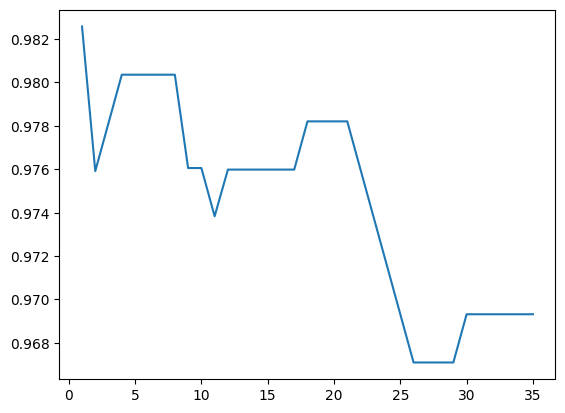

array([0.96774194, 0.93548387, 0.93548387, 1.        , 0.96774194,
       0.96666667, 0.93333333, 1.        , 1.        , 0.93333333,
       0.96666667, 0.96666667, 0.96666667, 1.        , 1.        ])

In [ ]:
# your code here
Cs_svm1 = np.linspace(1, 35, 35, dtype=int)#
Accuracies_svm1 = np.zeros(Cs_svm1.shape[0]) # or Accuracies = np.zeros(len(Cs_3))

for i,C_1 in enumerate(Cs_svm1): # i is the index (position) of the current element in Cs, while C is the actual value (element) at that index in Cs.
#method 2:for i in range(len(Cs_svm1)):
    #k_4 = Cs_svm1[i]
    clf_SVM1 = svm.SVC(kernel='rbf',C=C_1,gamma='scale') # try 'rbf' kernal later (not linear
    scores_4 = cross_val_score(estimator = clf_SVM1, X = X_train_std, y = y_train_2, cv=15, scoring='accuracy')#should have 4 scores as cs= num of chunks to split
    Accuracies_svm1[i]  = scores_4.mean()
    print(scores_4.mean(), end=' ')
#print(Accuracies_4)
plt.plot(Cs_svm1,Accuracies_svm1)
plt.show()
scores_4
# so C=4-6

0.9802415458937197 0.9801932367149758 0.9846859903381642 0.9846859903381642 0.9824637681159419 0.9824637681159419 0.9824637681159419 0.9780676328502416 0.9780676328502416 0.9758937198067633 0.9758937198067633 0.9758937198067633 0.973719806763285 0.973719806763285 0.973719806763285 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9714975845410627 0.9693236714975846 0.9671014492753625 0.9671014492753625 0.9671014492753625 0.9671014492753625 0.9671014492753625 0.9671014492753625 

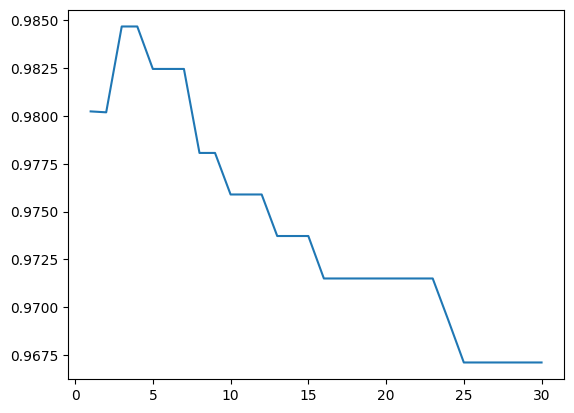

In [ ]:
from sklearn.model_selection import StratifiedKFold
Cs_svm1 = np.linspace(1, 30, 30, dtype=int)#
Accuracies_svm1 = np.zeros(Cs_svm1.shape[0]) # or Accuracies = np.zeros(len(Cs_3))

for i,C_1 in enumerate(Cs_svm1): # i is the index (position) of the current element in Cs, while C is the actual value (element) at that index in Cs.
#method 2:for i in range(len(Cs_svm1)):
    #k_4 = Cs_svm1[i]
    clf_SVM1 = svm.SVC(kernel='rbf',C=C_1,gamma='scale')
    cv_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) #Stratified k-fold cross-validation splits data into k folds while preserving the original class proportions, ensuring balanced representation in each fold, shuffle=True, random_state=1)
    scores_4 = cross_val_score(estimator = clf_SVM1, X = X_train_std, y = y_train_2, cv=cv_1, scoring='accuracy')#should have 4 scores as cs= num of chunks to split
    Accuracies_svm1[i]  = scores_4.mean()
    print(scores_4.mean(), end=' ')
#print(Accuracies_4)
plt.plot(Cs_svm1,Accuracies_svm1)
plt.show()

so C=3 (number of folds in CV=3 or 10 yieald C=3)

In [ ]:
clf_SVM2=svm.SVC(kernel='rbf',C=3,gamma='scale')
svm_fit1=clf_SVM2.fit(X_train_std,y_train_2)

In [ ]:
y_pred_SVM2_test = clf_SVM2.predict(X_test_std)#predict using test data as x
#print("Accuracy Train:", metrics.accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print("Accuracy for testing data:", metrics.accuracy_score(y_true=y_test_2, y_pred=y_pred_SVM2_test ))#using test dataset?
print('confusion matrix for testing data set:')
print(metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred_SVM2_test))

Accuracy for testing data: 0.9736842105263158
confusion matrix for testing data set:
[[40  2]
 [ 1 71]]


In [ ]:
y_pred_SVM2_train=clf_SVM2.predict(X_train_std)
print("Accuracy for training data:", metrics.accuracy_score(y_true=y_train_2, y_pred=y_pred_SVM2_train ))#using test dataset?
print('confusion matrix for training data set:')
print(metrics.confusion_matrix(y_true=y_train_2, y_pred=y_pred_SVM2_train))

Accuracy for training data: 0.9934065934065934
confusion matrix for testing data set:
[[167   3]
 [  0 285]]


In [ ]:

auc_test_svm = roc_auc_score(y_test_2, clf_SVM2.decision_function(X_test_std))
print("roc_auc of SVM (rbf kernel) for testing is :",auc_test_svm)

auc_train_svm = roc_auc_score(y_train_2, clf_SVM2.decision_function(X_train_std))
print("roc_auc of SVM (rbf kernel) for training is :",auc_train_svm)

roc_auc of SVM (rbf kernel) for testing is : 0.9943783068783069


In [ ]:

ap_svm_test = average_precision_score(y_test_2, clf_SVM2.decision_function(X_test_std))
print("Average Precision SVM testing:", ap_svm_test)

ap_svm_train = average_precision_score(y_train_2, clf_SVM2.decision_function(X_train_std))
print("Average Precision SVM training:", ap_svm_train)

Average Precision SVM testing: 0.9966643958482138


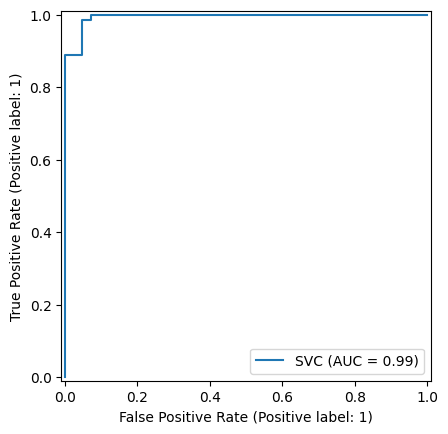

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

RocCurveDisplay.from_estimator(clf_SVM2, X_test_std, y_test_2) # this is the plot for label=1, i,e,benign

plt.show()


Fast trade off between FPR and TPR, and the area of ROC is close to 1,perfect overall performance.

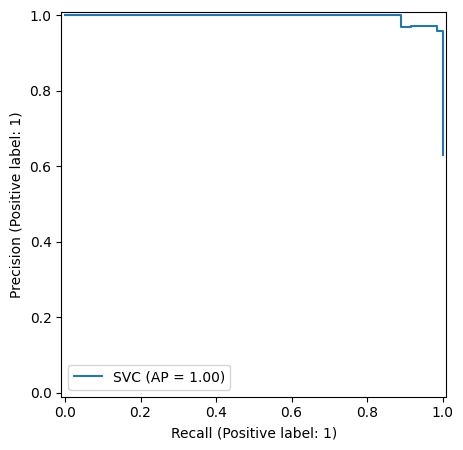

In [ ]:
PrecisionRecallDisplay.from_estimator(clf_SVM2, X_test_std, y_test_2)
plt.show()

# svc, linear kernel

0.9803864734299517 0.9737681159420291 0.9715942028985507 0.9715942028985507 0.9671497584541063 0.9671497584541063 0.9671497584541063 0.964975845410628 0.9627536231884057 0.9605314009661836 0.9582608695652175 0.9515942028985508 0.9515942028985508 0.9515942028985508 0.9493719806763286 0.9493719806763286 0.9493719806763286 0.9471980676328503 0.9494202898550725 0.9494202898550725 0.9494202898550725 0.9494202898550725 0.9516425120772947 0.9516425120772947 0.9516425120772947 0.9516425120772947 0.9516425120772947 0.9538647342995169 0.9538647342995169 0.9538647342995169 0.9516908212560387 0.9516908212560387 0.9516908212560387 0.9516908212560387 0.9516908212560387 

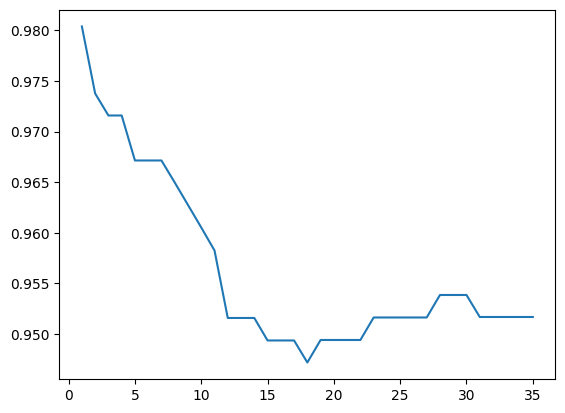

In [ ]:
Cs_svm_L1 = np.linspace(1, 35, 35, dtype=int)#
Accuracies_svm_L1 = np.zeros(Cs_svm_L1.shape[0]) # or Accuracies = np.zeros(len(Cs_3))

for i,C_L1 in enumerate(Cs_svm_L1): # i is the index (position) of the current element in Cs, while C is the actual value (element) at that index in Cs.
#method 2:for i in range(len(Cs_svm1)):
    #k_4 = Cs_svm_L1[i]
    clf_SVM_L1 = svm.SVC(kernel='linear',C=C_L1,gamma='scale') # try 'rbf' kernal later (not linear
    scores_L1 = cross_val_score(estimator = clf_SVM_L1, X = X_train_std, y = y_train_2, cv=10, scoring='accuracy')#should have 4 scores as cs= num of chunks to split
    Accuracies_svm_L1[i]  = scores_L1.mean()
    print(scores_L1.mean(), end=' ')
#print(Accuracies_4)
plt.plot(Cs_svm_L1,Accuracies_svm_L1)
plt.show()

0.9802898550724638 0.9780193236714976 0.9757971014492753 0.9758454106280194 0.9736714975845411 0.9714492753623188 0.9692270531400966 0.9692270531400966 0.971400966183575 0.9692270531400966 0.9692270531400966 0.9692270531400966 0.9692270531400966 0.9692270531400966 0.9670048309178745 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9691787439613527 0.9669565217391305 0.9669565217391305 0.9669565217391305 0.9669565217391305 0.9669565217391305 0.9647826086956522 0.9626086956521739 0.9604347826086957 0.9604347826086957 

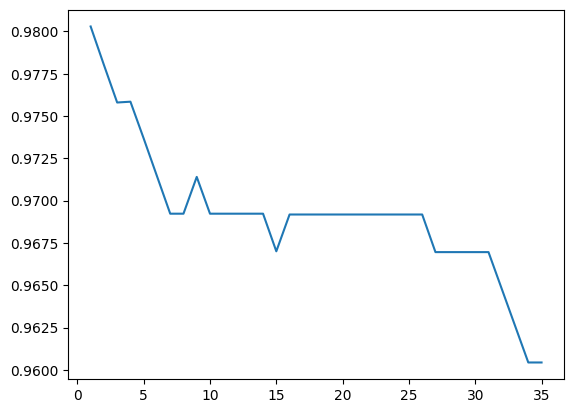

In [ ]:
Accuracies_svm_L2 = np.zeros(Cs_svm_L1.shape[0]) # or Accuracies = np.zeros(len(Cs_3))

for i,C_L2 in enumerate(Cs_svm_L1): # i is the index (position) of the current element in Cs, while C is the actual value (element) at that index in Cs.
#method 2:for i in range(len(Cs_svm1)):
    #k_4 = Cs_svm_L2[i]
    clf_SVM_L2 = svm.SVC(kernel='linear',C=C_L2)
    cv_L2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) #Stratified k-fold cross-validation splits data into k folds while preserving the original class proportions, ensuring balanced representation in each fold, shuffle=True, random_state=1)
    scores_L2 = cross_val_score(estimator = clf_SVM_L2, X = X_train_std, y = y_train_2, cv=cv_L2, scoring='accuracy')#should have 4 scores as cs= num of chunks to split
    Accuracies_svm_L2[i]  = scores_L2.mean()
    print(scores_L2.mean(), end=' ')

plt.plot(Cs_svm_L1,Accuracies_svm_L2)
plt.show()

In [ ]:
clf_SVM_L3=svm.SVC(kernel='linear',C=1)
svm_fit2=clf_SVM_L3.fit(X_train_std,y_train_2)

In [ ]:
y_pred_SVM_L_train=clf_SVM_L3.predict(X_train_std)
print("Accuracy for training data, SVC linear:", metrics.accuracy_score(y_true=y_train_2, y_pred=y_pred_SVM_L_train ))

y_pred_SVM_L_test=clf_SVM_L3.predict(X_test_std)
print("Accuracy for testing data, SVC linear:", metrics.accuracy_score(y_true=y_test_2, y_pred=y_pred_SVM_L_test ))

Accuracy for training data: 0.989010989010989


Accuracy for training data: 0.9824561403508771


In [ ]:
print('confusion matrix for testing data set, SVC linear:')
print(metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred_SVM_L_test))

confusion matrix for testing data set (linear):
[[40  2]
 [ 0 72]]


In [ ]:

auc_test_svm_linear = roc_auc_score(y_test_2, clf_SVM_L3.decision_function(X_test_std))
print("roc_auc of SVM (linear kernel) for testing is :",auc_test_svm_linear)

auc_train_svm_linear = roc_auc_score(y_train_2, clf_SVM_L3.decision_function(X_train_std))
print("roc_auc of SVM (linear kernel) for training is :",auc_train_svm_linear)

ap_svm_test_linear = average_precision_score(y_test_2, clf_SVM_L3.decision_function(X_test_std))
print("Average Precision SVM (linear kernel) testing:", ap_svm_test)

ap_svm_train_linear = average_precision_score(y_train_2, clf_SVM_L3.decision_function(X_train_std))
print("Average Precision SVM (linear kernel) training:", ap_svm_train)

In [ ]:
RocCurveDisplay.from_estimator(clf_SVM_L3, X_test_std, y_test_2) # this is the plot for label=1, i,e,benign

plt.show()

In [ ]:
PrecisionRecallDisplay.from_estimator(clf_SVM_L3, X_test_std, y_test_2)
plt.show()